# Lab 06. 인공 신경망 : 100 에포크 마다 산점도 시각화 실습
---

In [1]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

In [2]:
# 인공 신경망 모델 클래스 정의 
class SimpleNet(nn.Module) : 
    """
    이진 분류 문제 
    입력층 2개 , 은닉층 1개 (노드 5) 출력층 1개 (시그모이 활성화 함수 사용)
    """
    def __init__(self) :
        super(SimpleNet, self).__init__()    # 부모 클래스에 메서드 호출 하는 방법
        self.fc2 = nn.Linear(5,1)
        pass
    
    def forward(self, x) :
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        return x

## 데이터 생성

In [3]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0) & (x[:,1] > 0)).float()

print(x)
print(y)

tensor([[ 0.5180, -0.4595],
        [-0.4583,  0.8743],
        [ 0.2070,  0.2441],
        [-0.2385,  1.2850],
        [ 1.1862,  0.5709],
        [-0.7761, -0.5921],
        [-0.6829, -1.0800],
        [-1.4115,  1.2741],
        [ 0.2789, -1.5560],
        [ 0.7629,  1.7773],
        [ 0.3465,  1.7000],
        [-1.3154,  1.4892],
        [-0.7084,  0.2610],
        [-0.1194,  0.9708],
        [ 0.2304, -0.7001],
        [ 2.9393,  0.6213],
        [-0.8886, -2.0947],
        [-0.3310, -0.8055],
        [ 1.2785,  0.8774],
        [ 0.3160, -1.0375],
        [ 1.0391,  1.4437],
        [ 0.0684,  0.6324],
        [-1.6351,  0.6142],
        [ 0.3600,  0.0699],
        [-0.4582, -0.6730],
        [-0.5631,  0.6953],
        [ 0.0644,  0.4067],
        [-0.7450,  0.2420],
        [-0.7141,  1.1065],
        [-0.2921, -0.5052],
        [-0.3667, -1.3210],
        [-0.2880,  1.1851],
        [-2.1743,  0.7738],
        [-0.1665,  1.7379],
        [ 0.9343,  0.2840],
        [-0.6009,  0

## 모델 선언

In [4]:
model = SimpleNet()

print(model)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


## loss 함수와 옵티마이저 정의 

### 학습

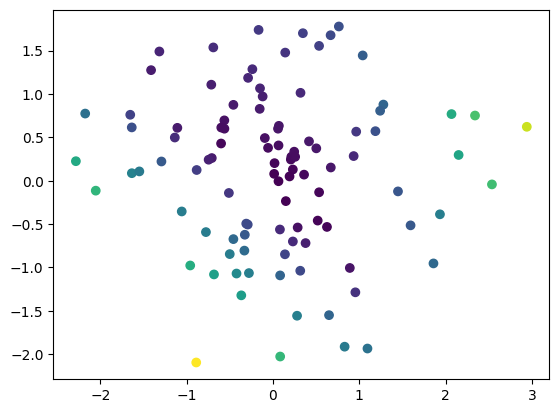

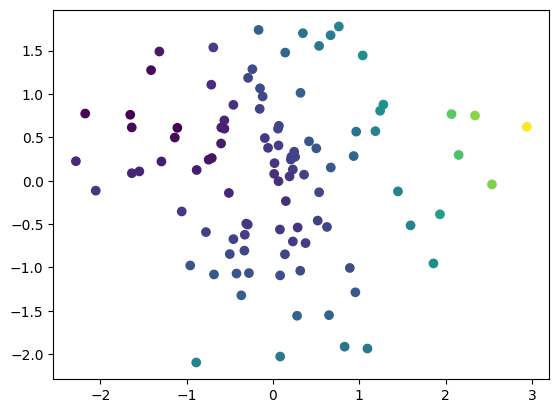

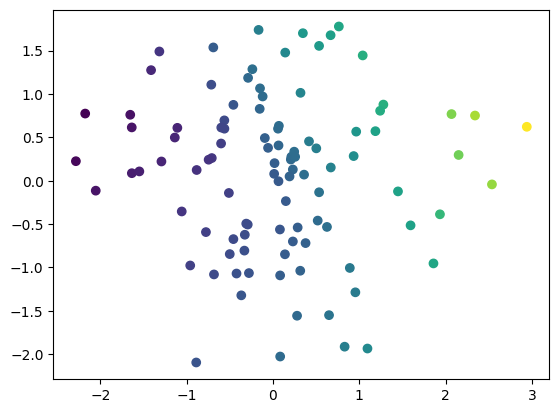

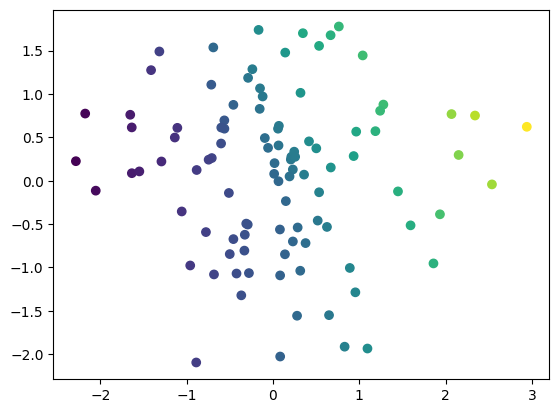

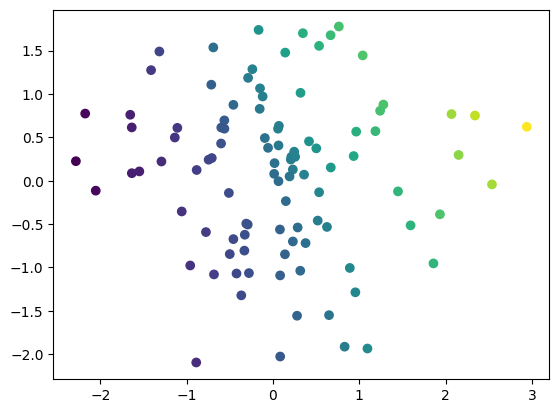

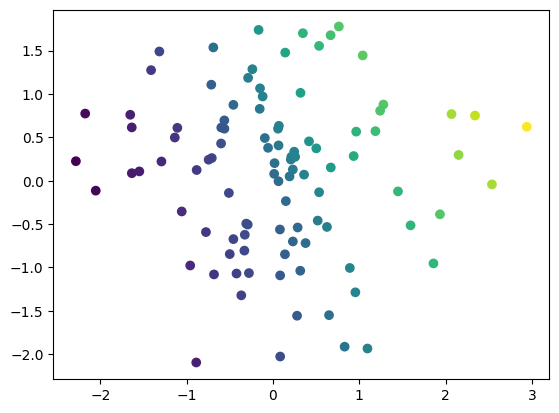

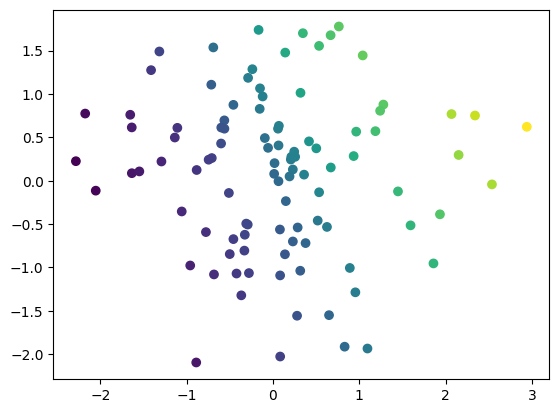

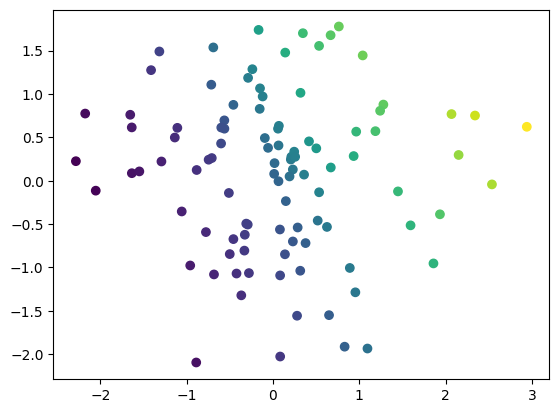

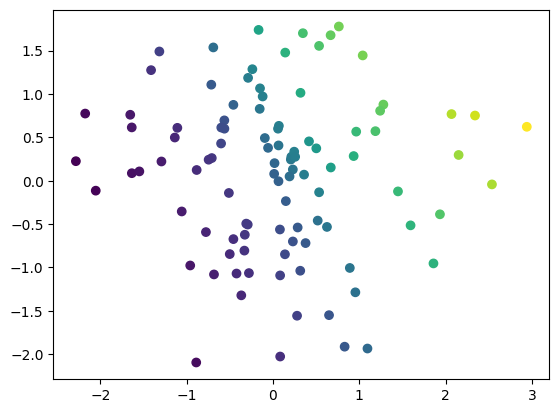

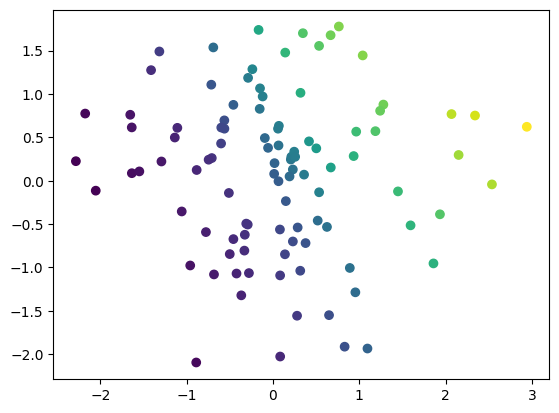

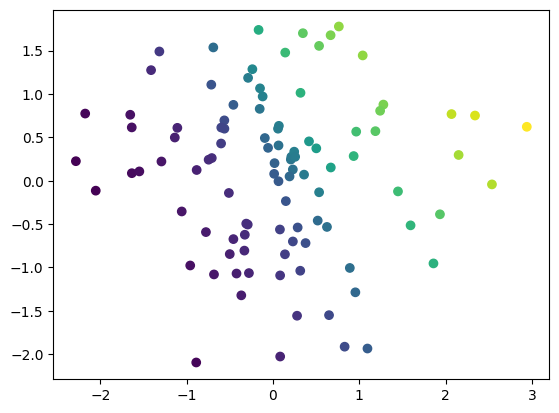

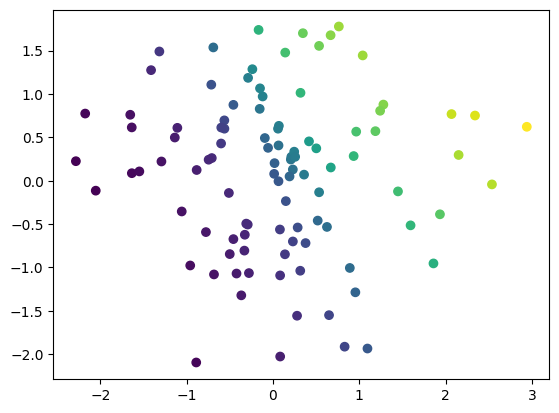

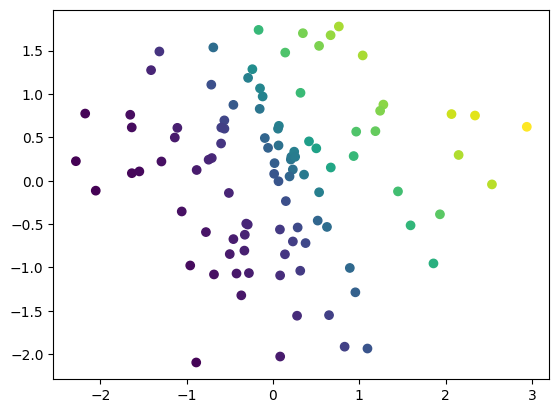

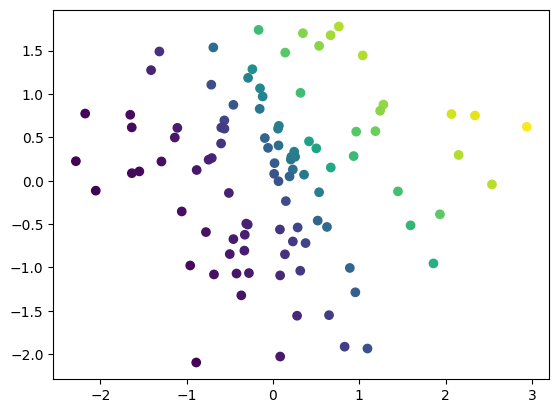

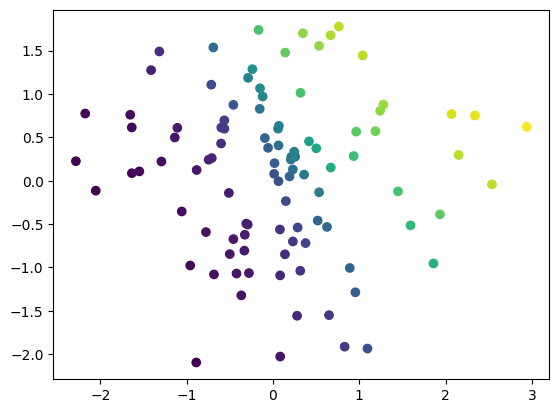

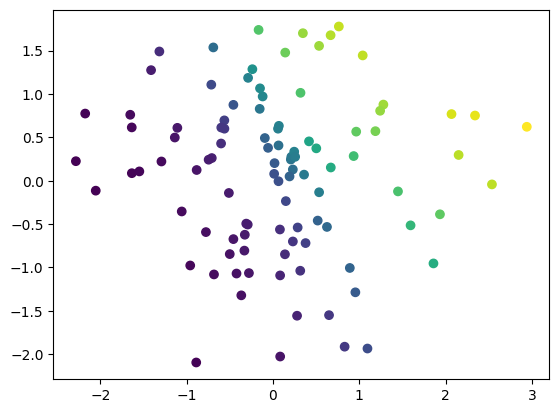

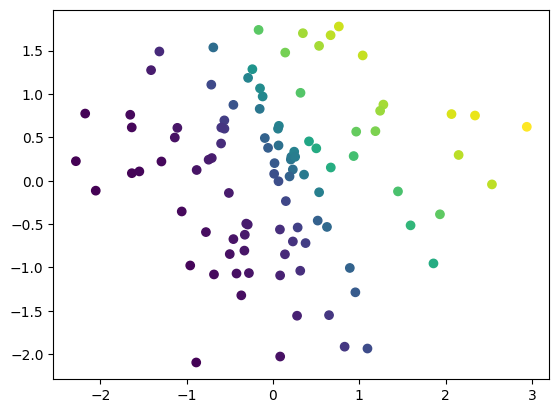

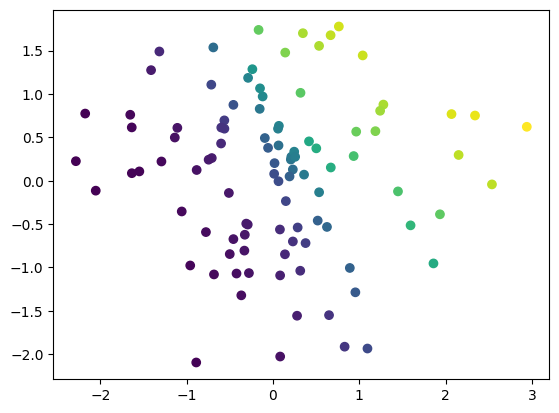

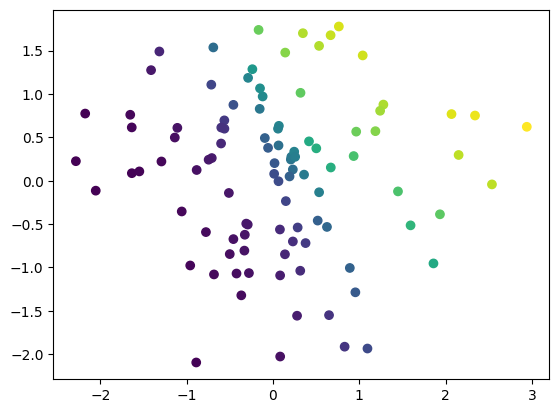

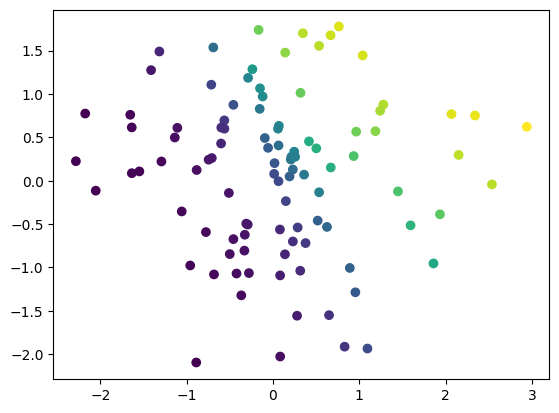

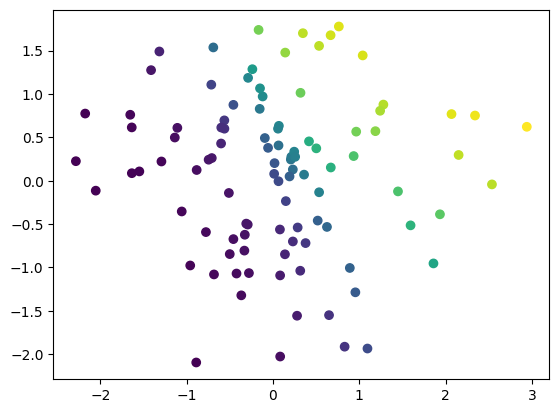

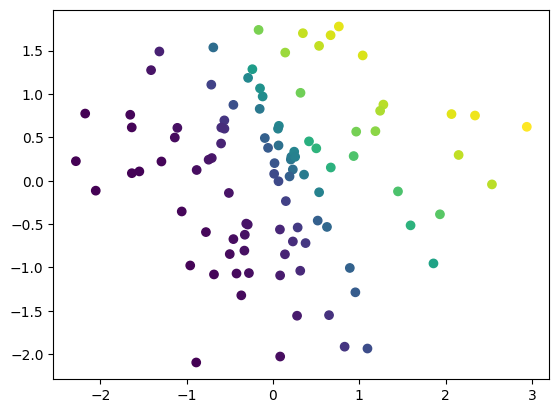

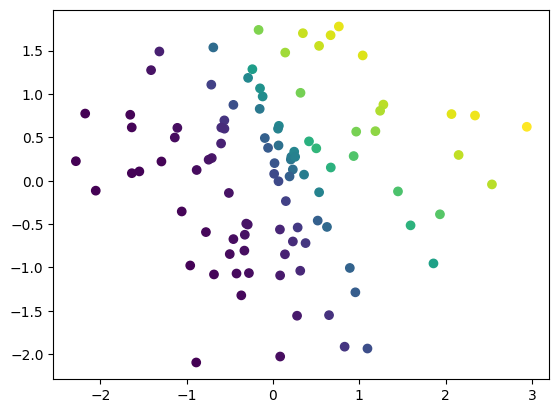

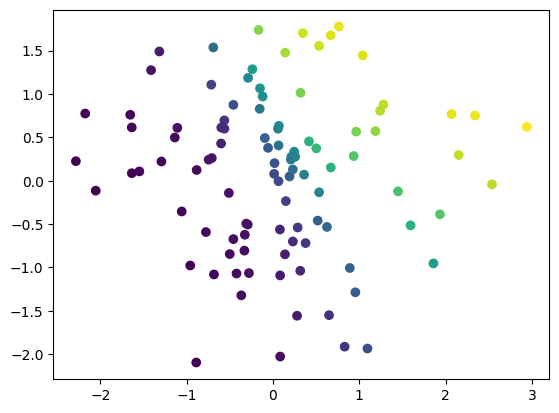

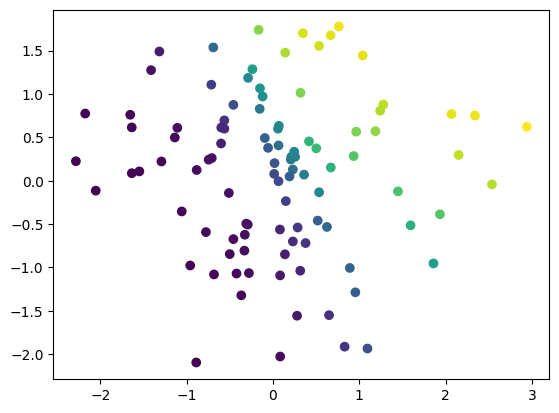

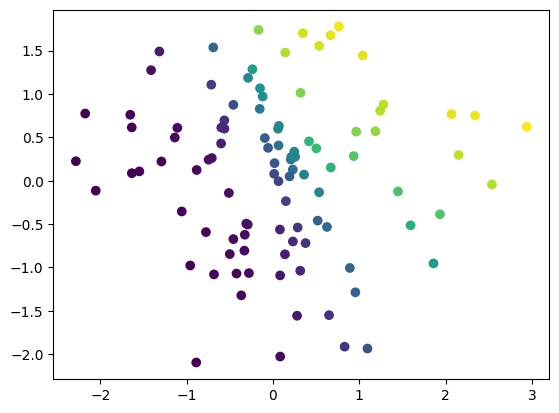

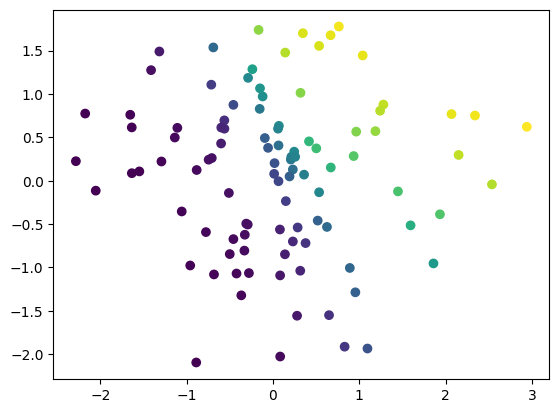

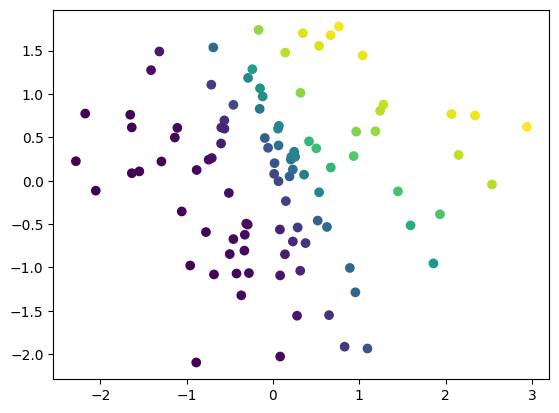

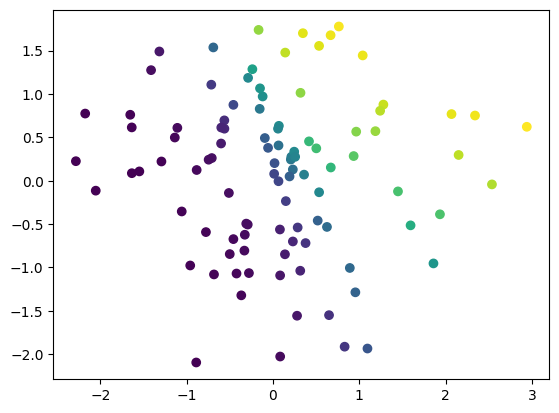

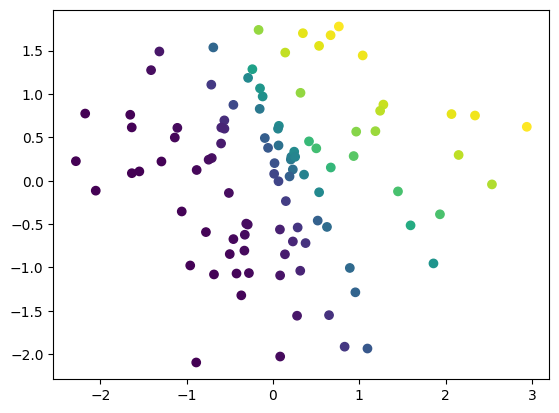

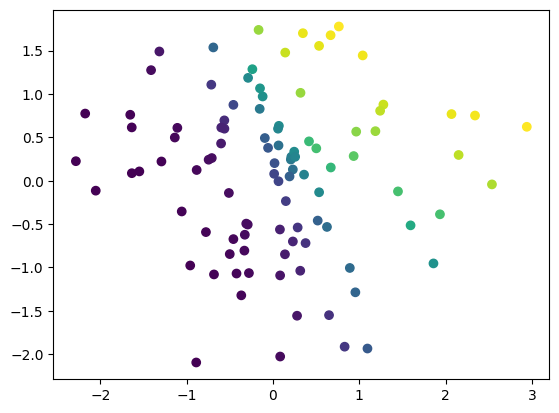

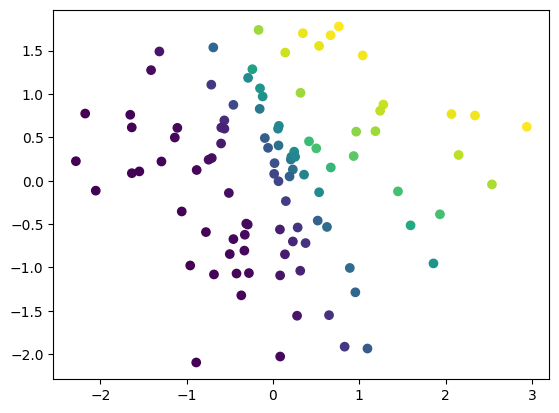

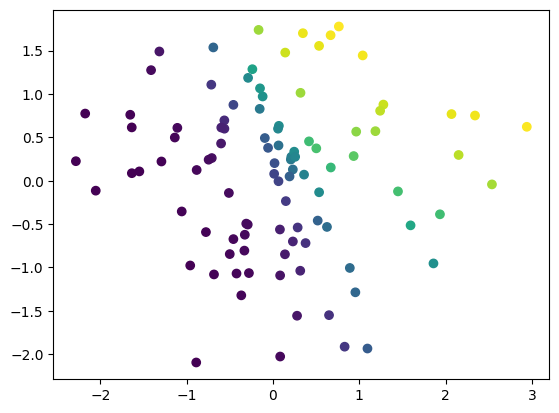

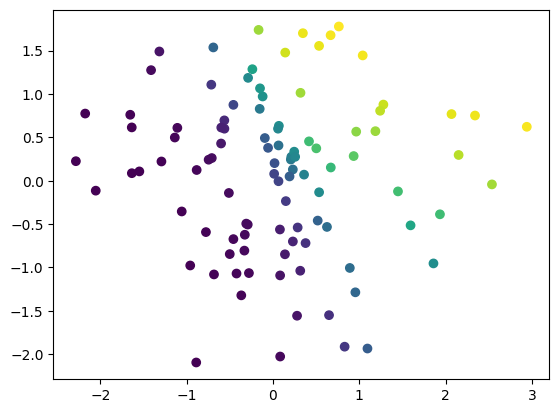

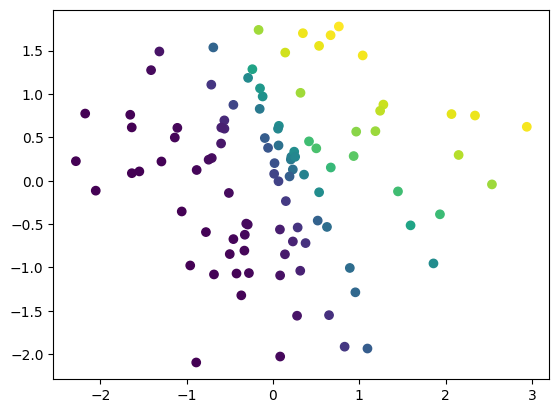

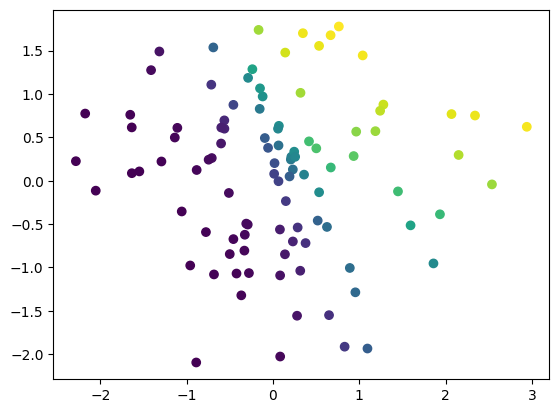

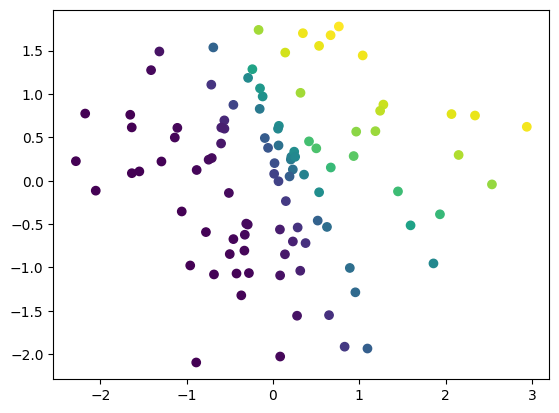

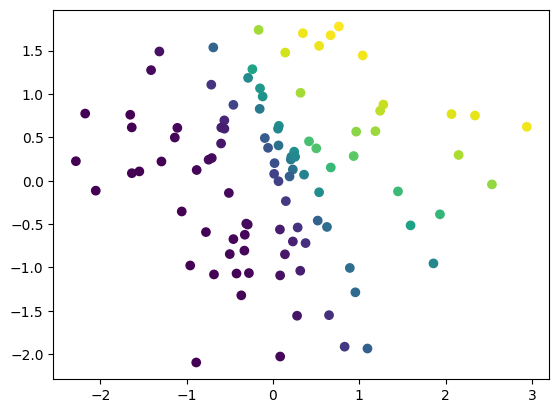

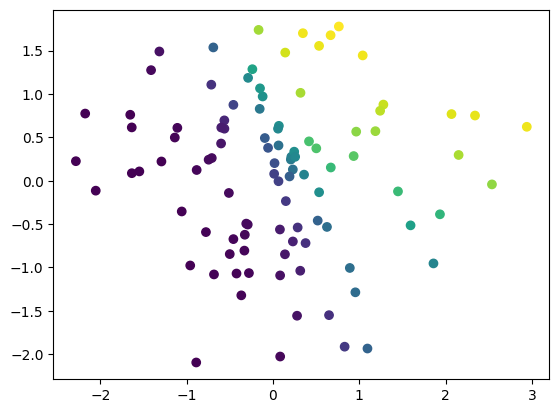

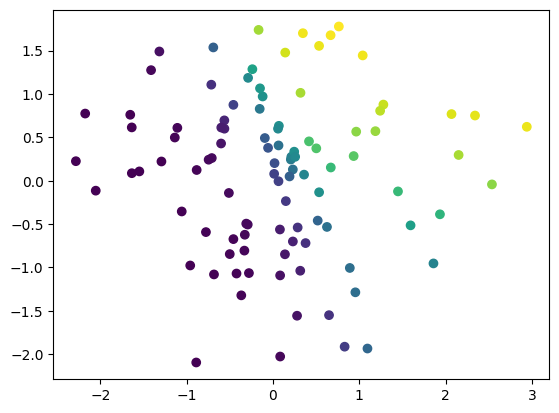

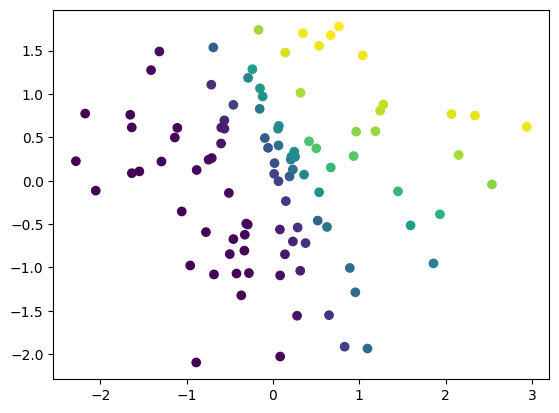

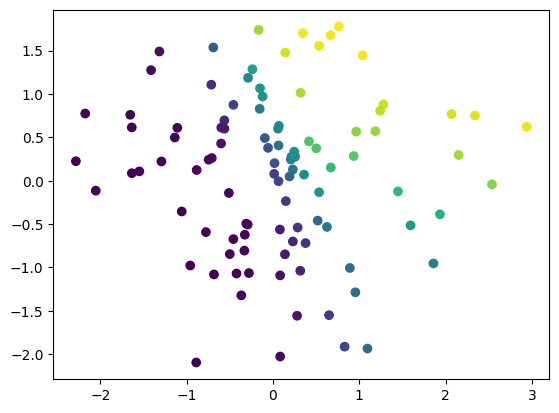

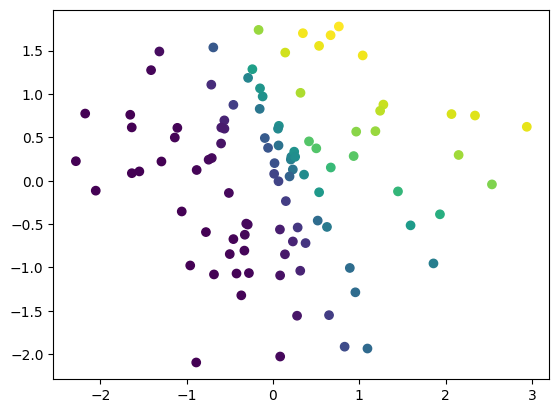

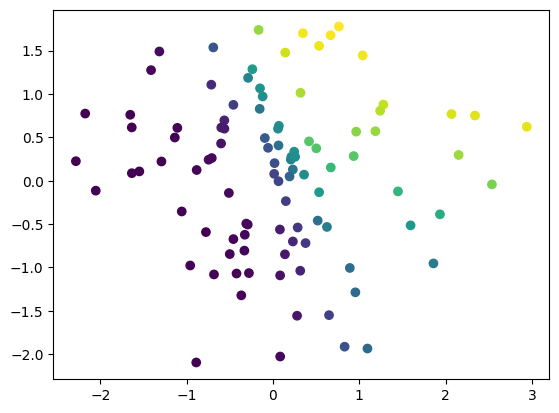

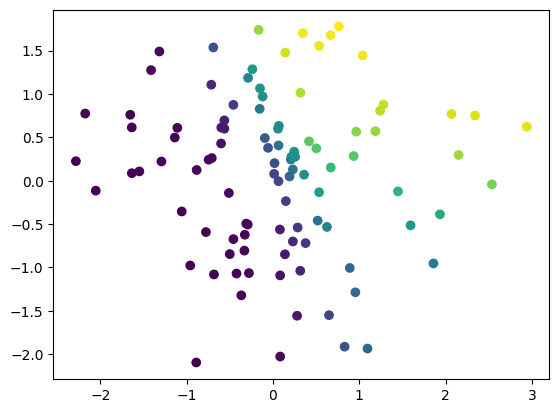

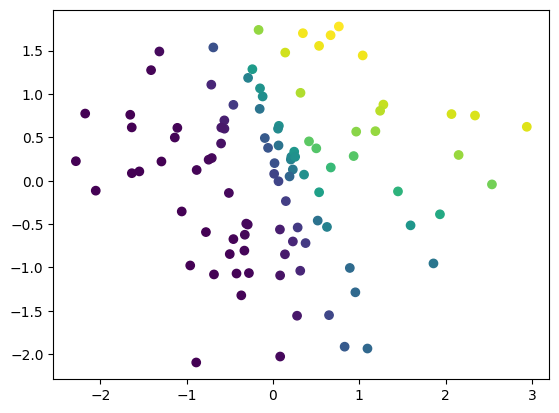

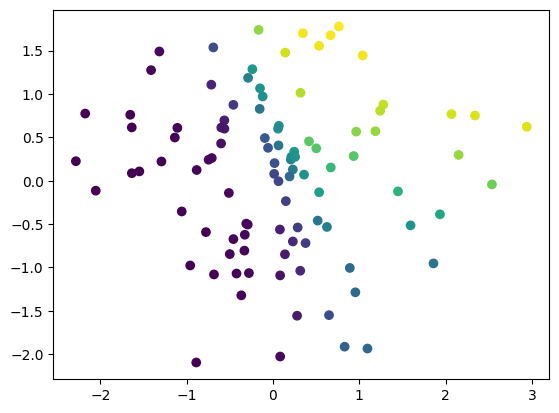

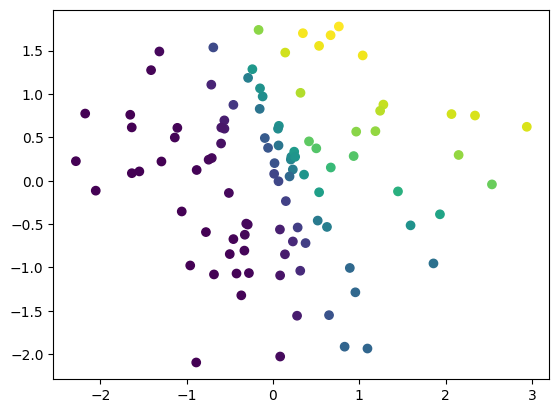

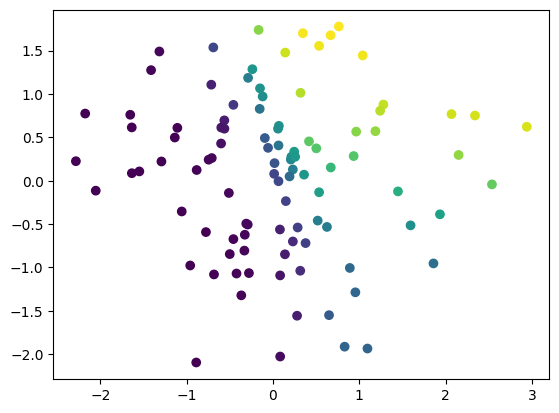

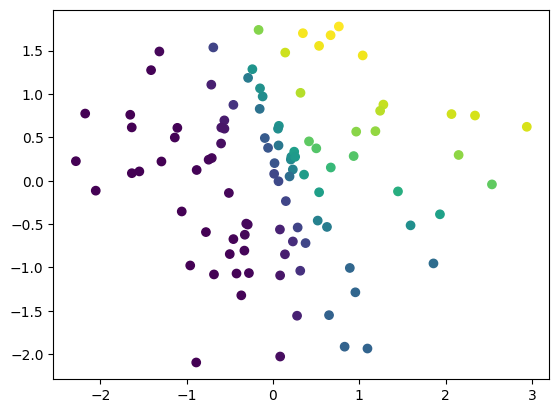

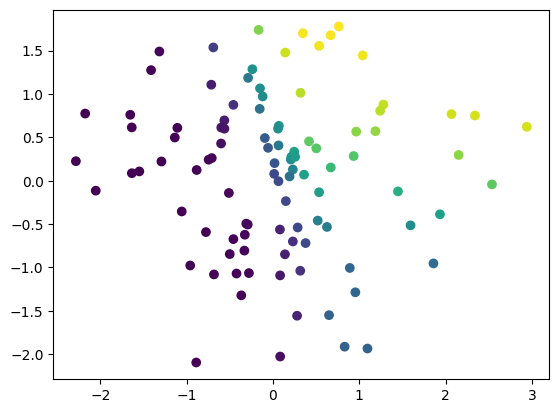

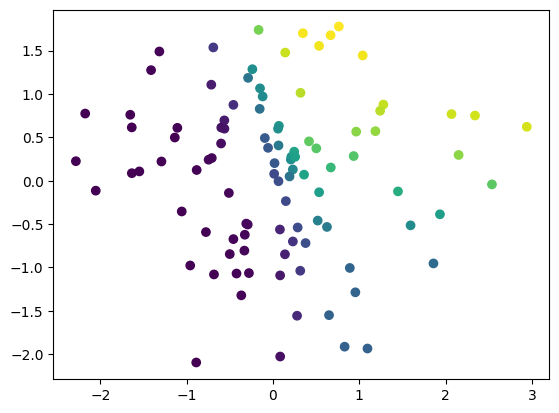

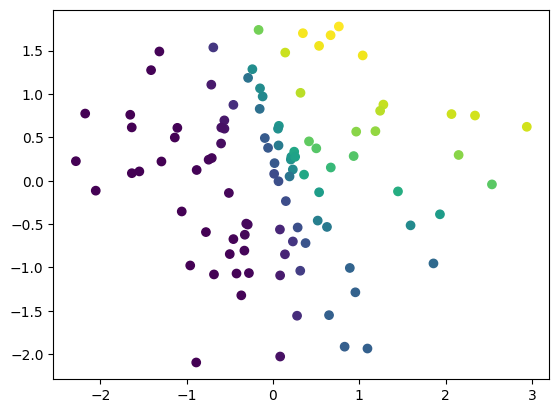

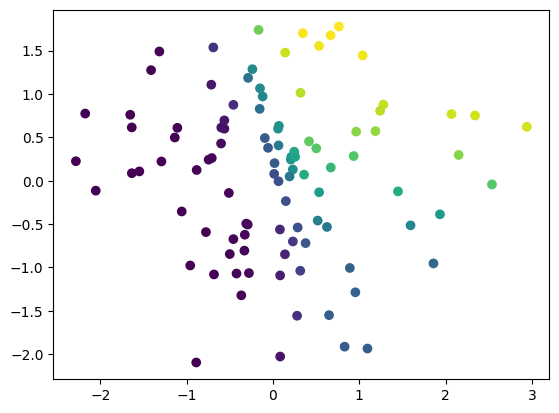

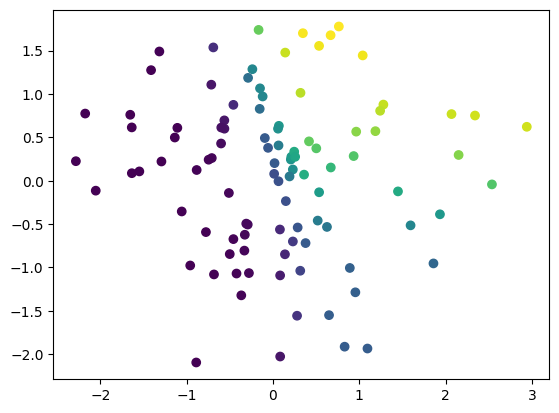

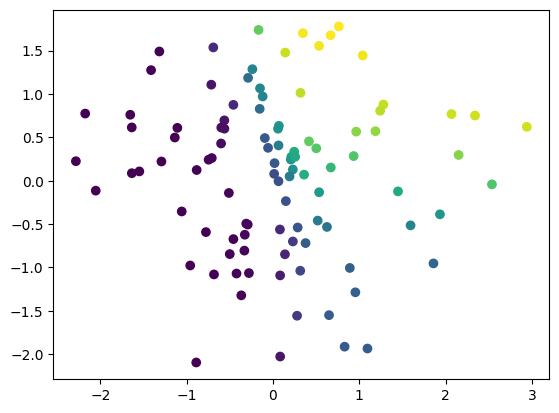

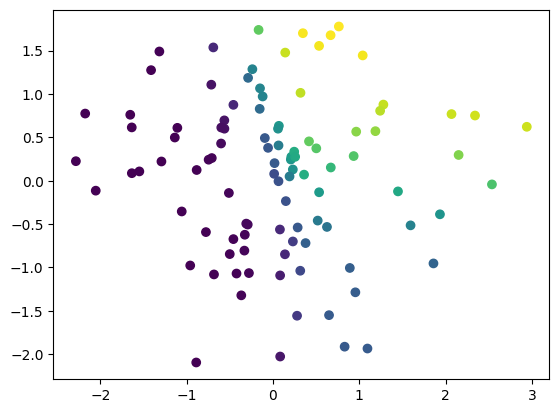

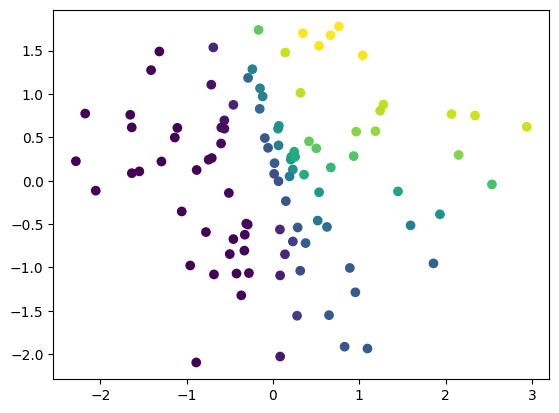

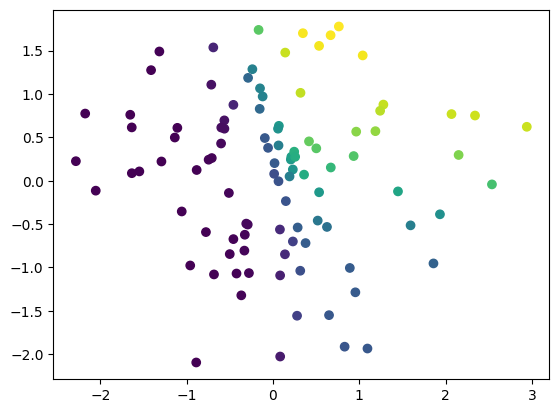

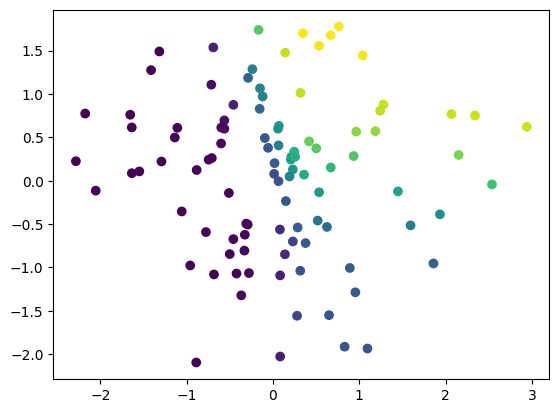

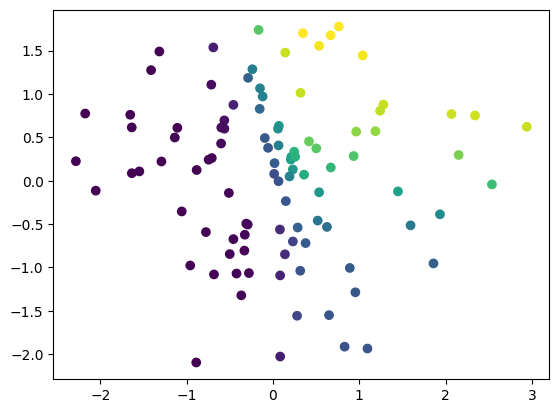

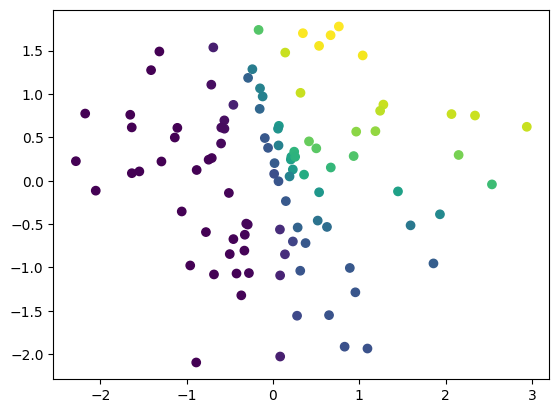

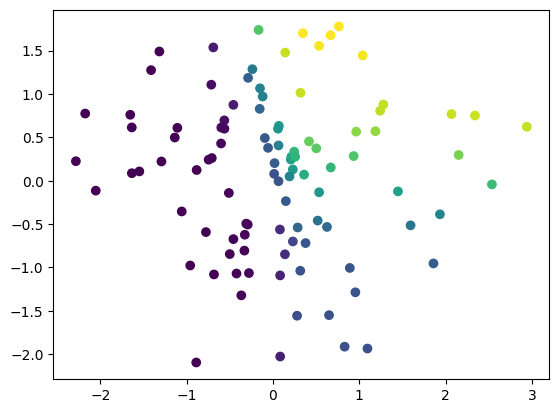

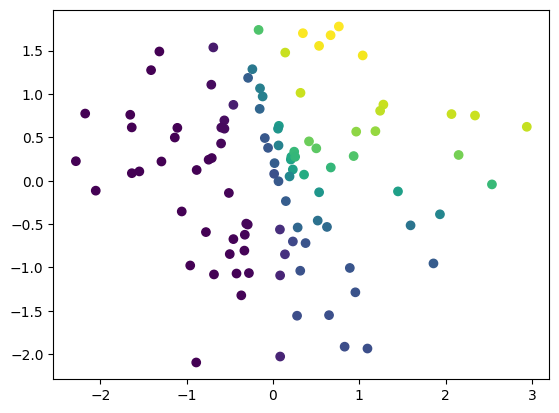

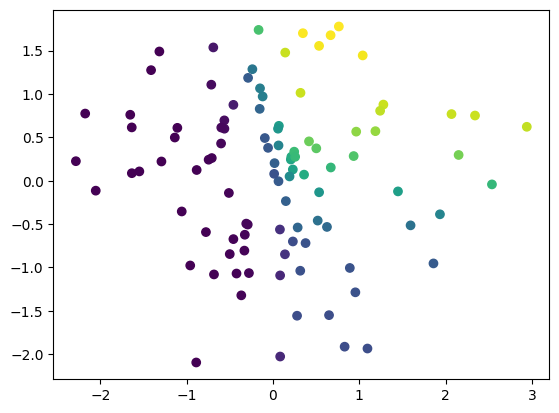

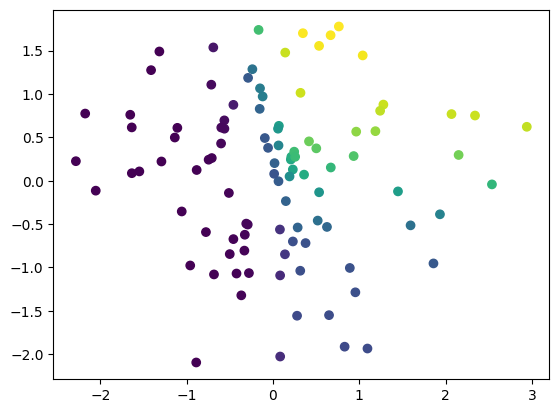

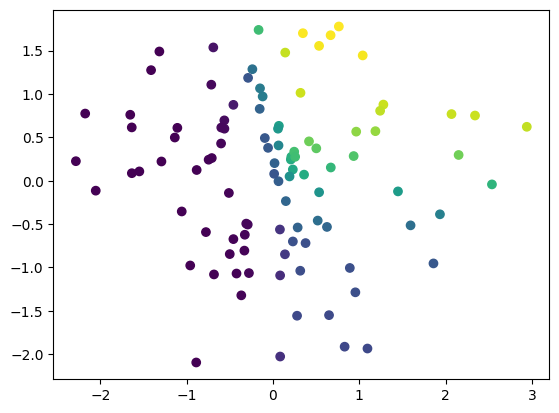

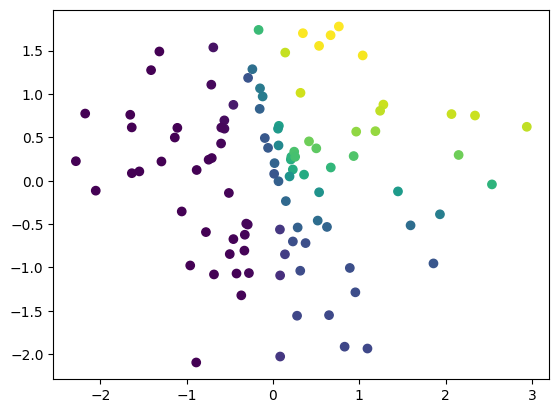

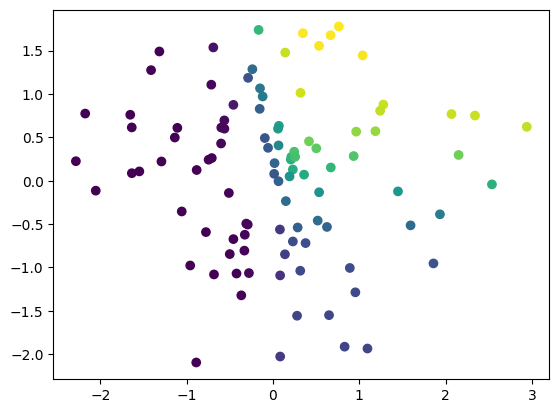

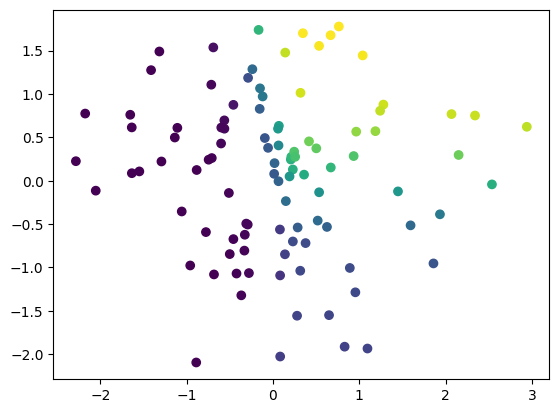

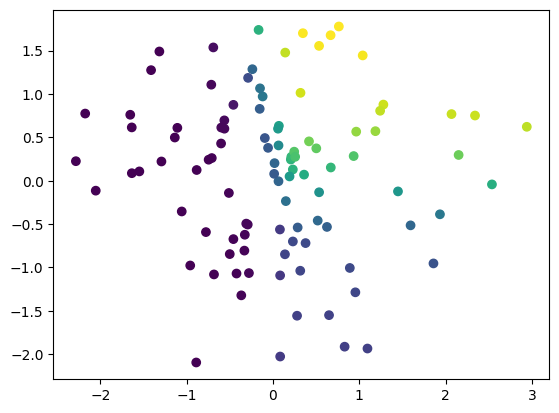

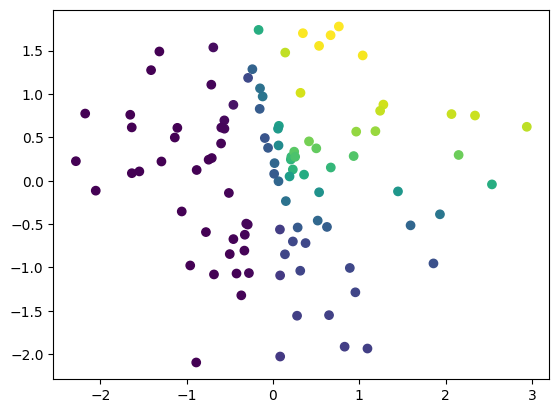

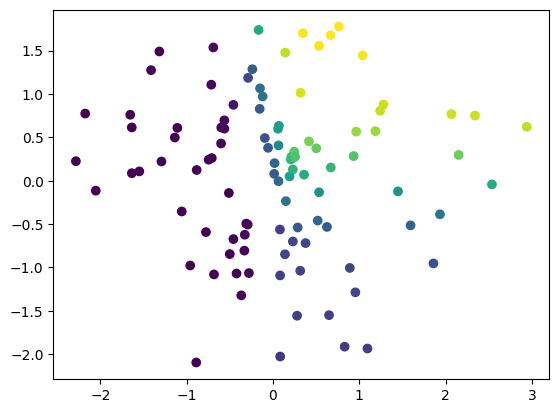

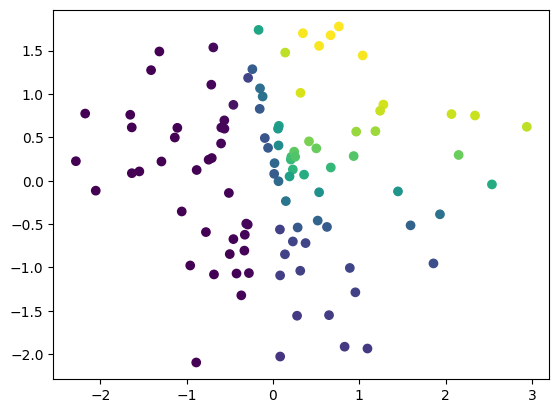

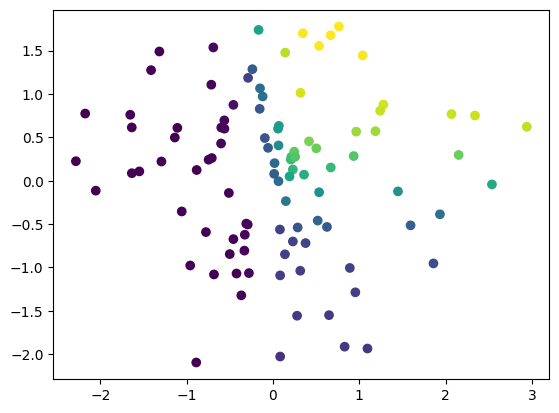

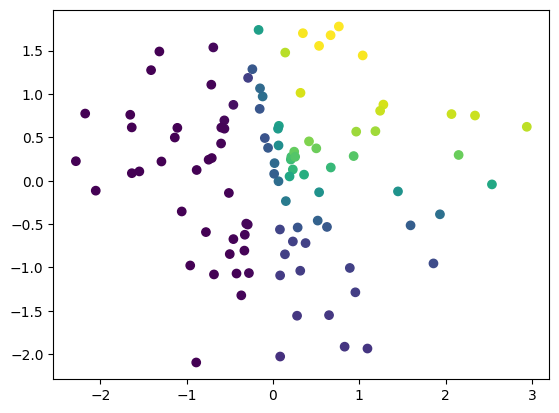

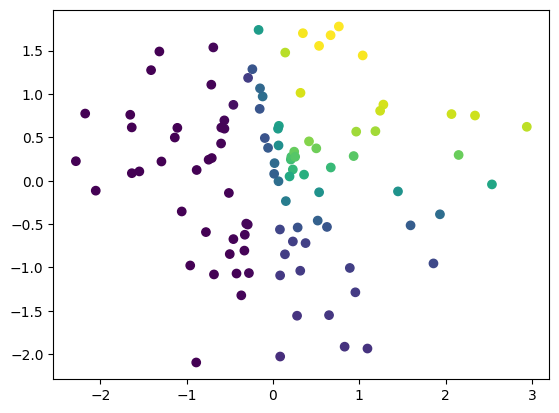

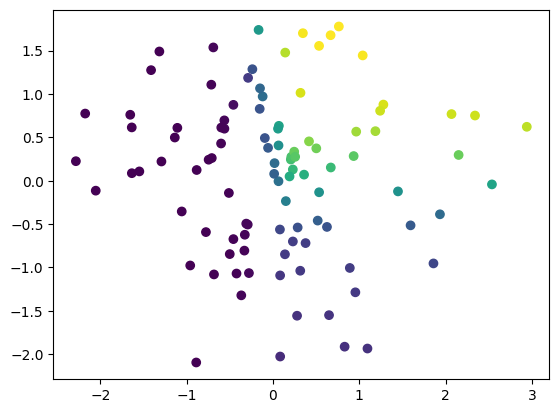

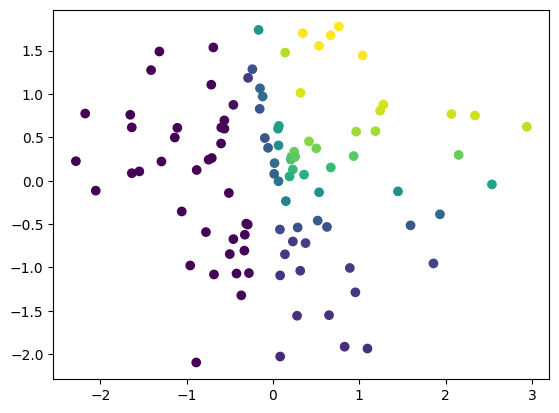

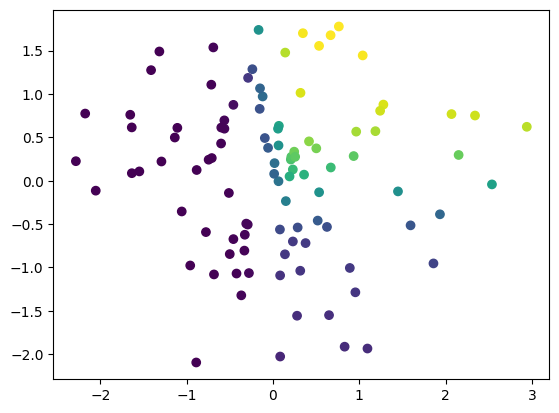

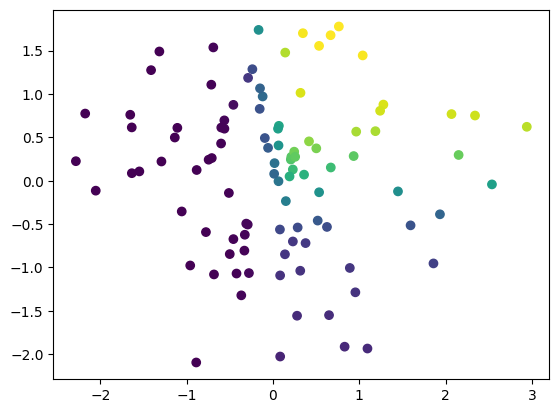

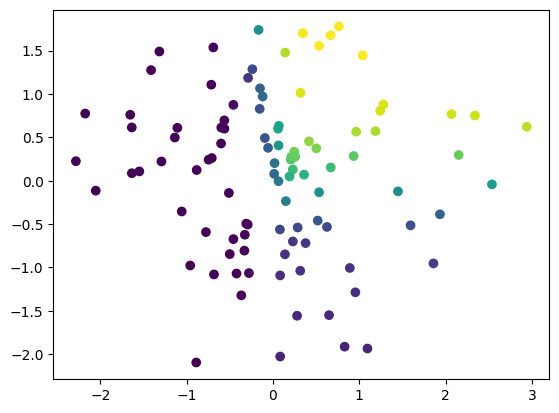

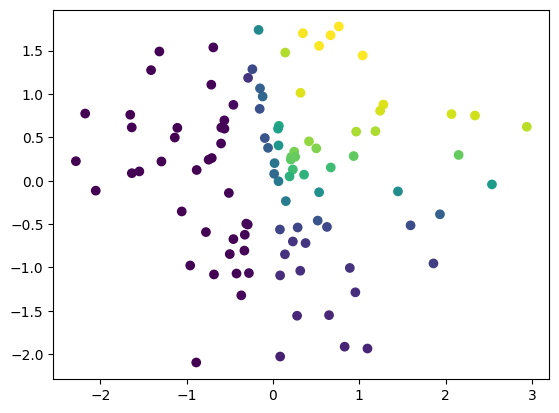

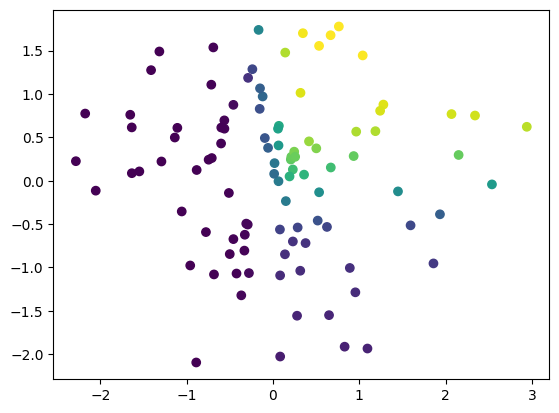

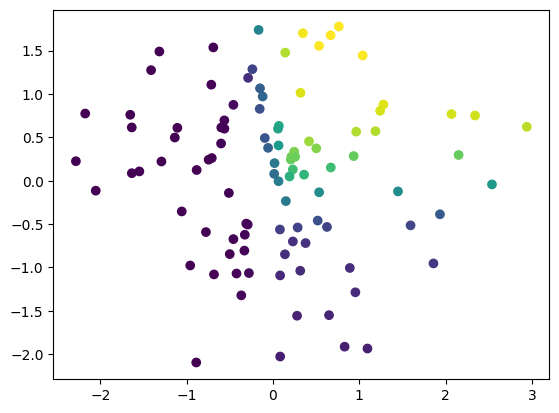

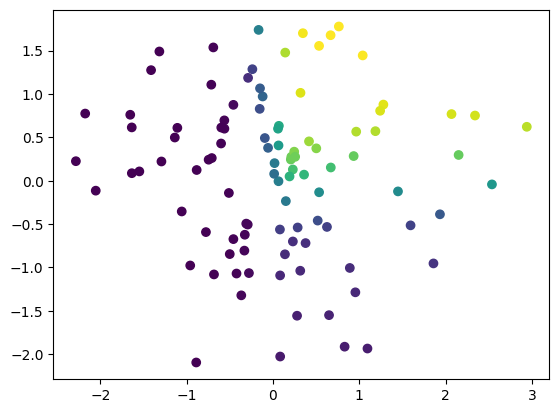

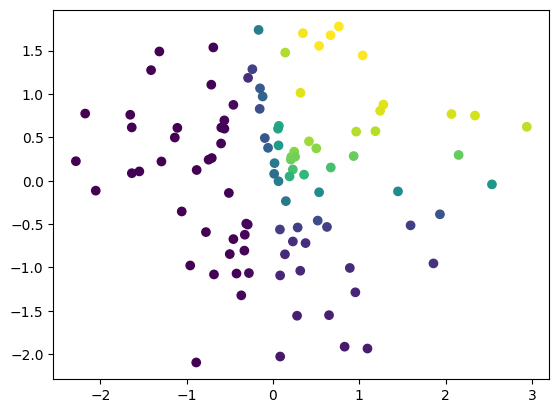

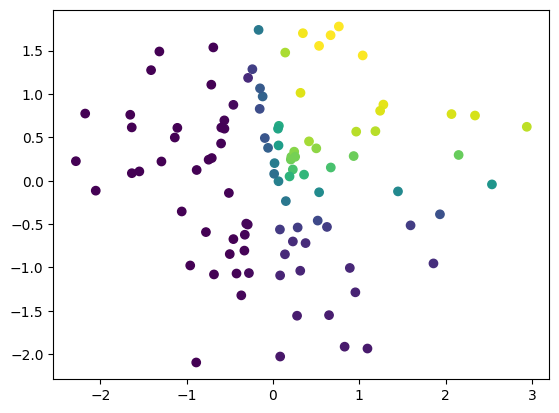

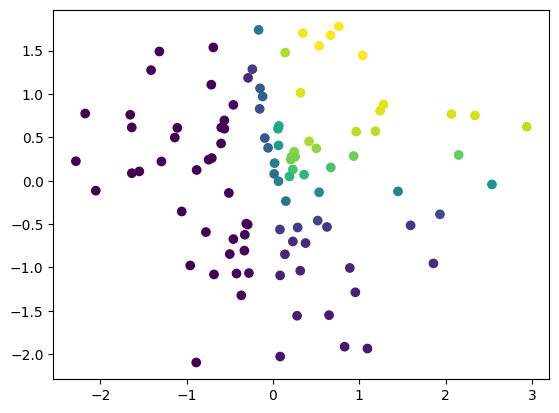

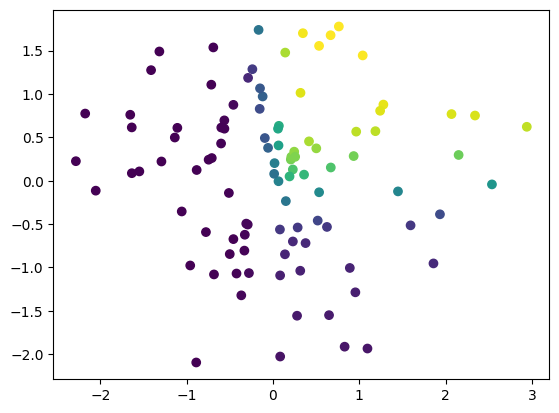

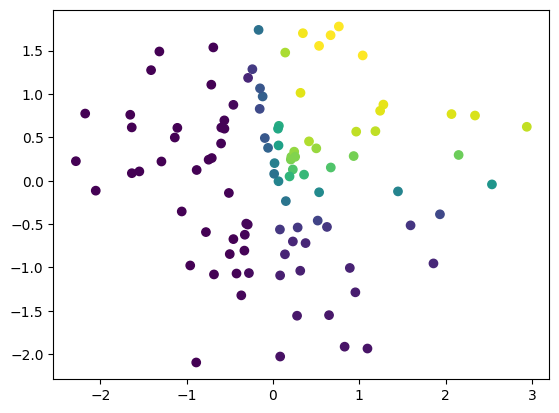

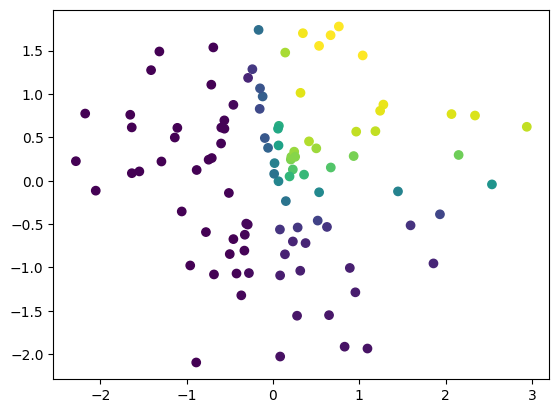

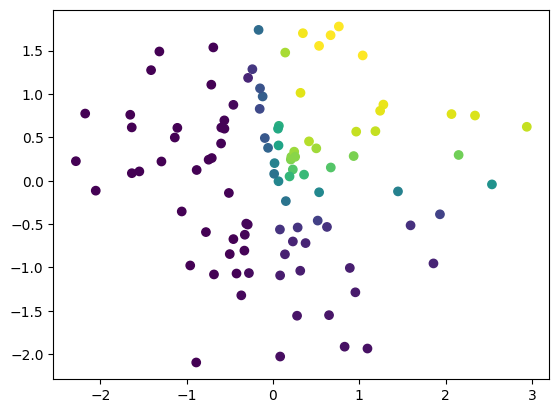

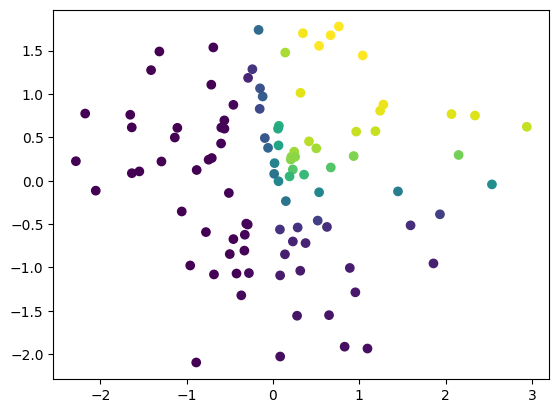

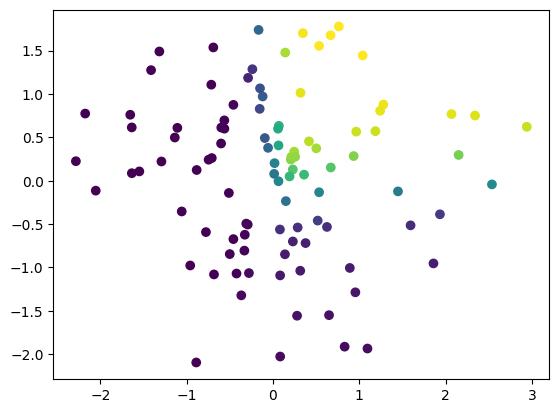

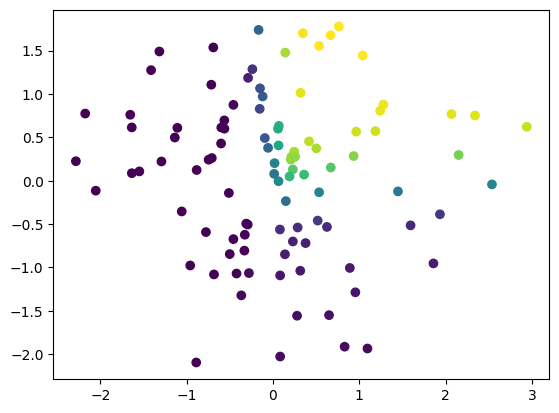

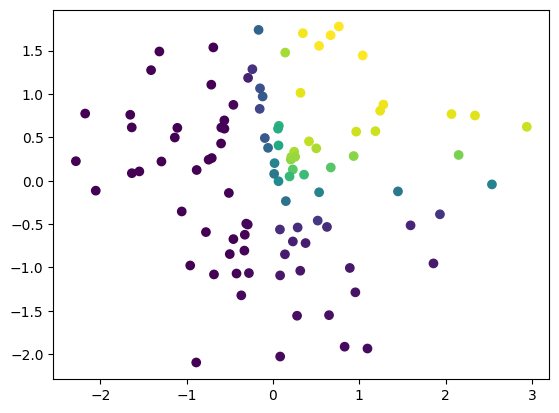

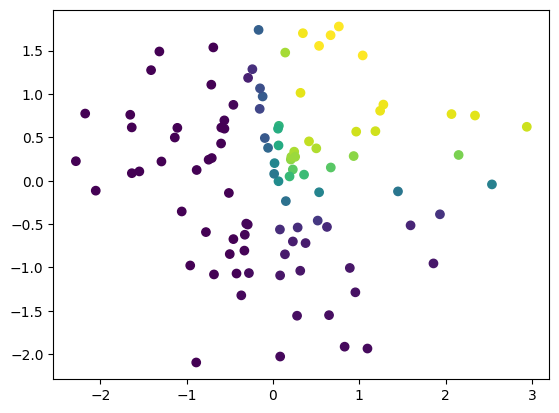

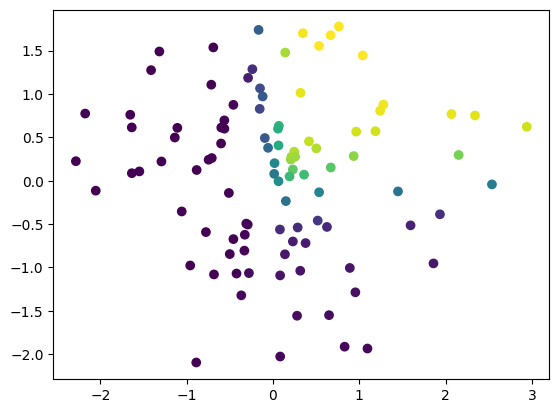

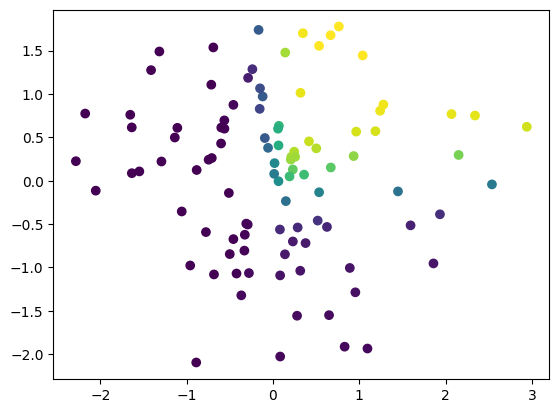

학습 완료 !!!


In [6]:
for epoch in range(1000) : 
    # 순전파 단계 
    y_pred = model(x)
    
    # loss 
    loss = criterion(y_pred.squeeze(), y)
    
    # 역전파 
    optimizer.zero_grad()   # 옵티 마이저의 모든 가중치에 대한 변화 0으로 초기화 -> 이전 기울기 값이 남아있을 가능성이 있기 때문 
    loss.backward()         # 손실 함수 역전파 수행 
    optimizer.step()        # 옵티 마이저 가중치 업데이트 
    
    if epoch % 10 == 0 :
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
        plt.show()
        
print("학습 완료 !!!")

- 각 산점도 이미지를 저장한 후, 아래의 라이브러리(`imageio`)를 이용하면 GIF 파일을 만들 수 있다.

In [ ]:
import imageio

# 이미지 프레임들의 리스트
frames = ['frame1.png', 'frame2.png', 'frame3.png', ...]

# 이미지 프레임들을 GIF 파일로 저장
with imageio.get_writer('animation.gif', mode='I', duration=0.2) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)